# scikit-learn - Linear regression

We start with perhaps our simplest possible example, using **Scikit-Learn** to perform linear regression analysis on a data set produced by us. 

What follows is a simple Python code where we have defined a function
$y$ in terms of the variable $x$. Both are defined as vectors with  $100$ entries. 
The numbers in the vector $\hat{x}$ are given
by random numbers generated with a uniform distribution with entries
$x_i \in [0,1]$ (more about probability distribution functions
later). These values are then used to define a function $y(x)$
(tabulated again as a vector) with a linear dependence on $x$ plus a
random noise added via the normal distribution.


The Numpy functions are imported used the **import numpy as np**
statement and the random number generator for the uniform distribution
is called using the function **np.random.rand()**, where we specificy
that we want $100$ random variables.  Using Numpy we define
automatically an array with the specified number of elements, $100$ in
our case.  With the Numpy function **randn()** we can compute random
numbers with the normal distribution (mean value $\mu$ equal to zero and
variance $\sigma^2$ set to one) and produce the values of $y$ assuming a linear
dependence as function of $x$

$$
y = 2x+N(0,1),
$$

where $N(0,1)$ represents random numbers generated by the normal
distribution.  From **Scikit-Learn** we import then the
**LinearRegression** functionality and make a prediction $\tilde{y} =
\alpha + \beta x$ using the function **fit(x,y)**. We call the set of
data $(\hat{x},\hat{y})$ for our training data. The Python package
**scikit-learn** has also a functionality which extracts the above
fitting parameters $\alpha$ and $\beta$ (see below). Later we will
distinguish between training data and test data.

For plotting we use the Python package
[matplotlib](https://matplotlib.org/) which produces publication
quality figures. Feel free to explore the extensive
[gallery](https://matplotlib.org/gallery/index.html) of examples. In
this example we plot our original values of $x$ and $y$ as well as the
prediction **ypredict** ($\tilde{y}$), which attempts at fitting our
data with a straight line.

The Python code follows here.

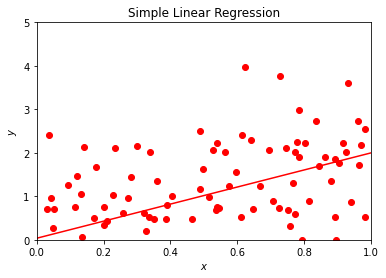

In [1]:
# Importing various packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

x = np.random.rand(100,1)
y = 2*x+np.random.randn(100,1)
linreg = LinearRegression()
linreg.fit(x,y)
xnew = np.array([[0],[1]])
ypredict = linreg.predict(xnew)

plt.plot(xnew, ypredict, "r-")
plt.plot(x, y ,'ro')
plt.axis([0,1.0,0, 5.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Simple Linear Regression')
plt.show()

This example serves several aims. It allows us to demonstrate several
aspects of data analysis and later machine learning algorithms. The
immediate visualization shows that our linear fit is not
impressive. It goes through the data points, but there are many
outliers which are not reproduced by our linear regression.  We could
now play around with this small program and change for example the
factor in front of $x$ and the normal distribution.  Try to change the
function $y$ to

$$
y = 10x+0.01 \times N(0,1),
$$

where $x$ is defined as before.  Does the fit look better? Indeed, by
reducing the role of the noise given by the normal distribution we see immediately that
our linear prediction seemingly reproduces better the training
set. However, this testing 'by the eye' is obviouly not satisfactory in the
long run. Here we have only defined the training data and our model, and 
have not discussed a more rigorous approach to the **cost** function.

We need more rigorous criteria in defining whether we have succeeded or
not in modeling our training data.  You will be surprised to see that
many scientists seldomly venture beyond this 'by the eye' approach. A
standard approach for the *cost* function is the so-called $\chi^2$
function (a variant of the mean-squared error (MSE))

$$
\chi^2 = \frac{1}{n}
\sum_{i=0}^{n-1}\frac{(y_i-\tilde{y}_i)^2}{\sigma_i^2},
$$

where $\sigma_i^2$ is the variance (to be defined later) of the entry
$y_i$.  We may not know the explicit value of $\sigma_i^2$, it serves
however the aim of scaling the equations and make the cost function
dimensionless.  

Minimizing the cost function is a central aspect of
our discussions to come. Finding its minima as function of the model
parameters ($\alpha$ and $\beta$ in our case) will be a recurring
theme in these series of lectures. Essentially all machine learning
algorithms we will discuss center around the minimization of the
chosen cost function. This depends in turn on our specific
model for describing the data, a typical situation in supervised
learning. Automatizing the search for the minima of the cost function is a
central ingredient in all algorithms. Typical methods which are
employed are various variants of **gradient** methods. These will be
discussed in more detail later. Again, you'll be surprised to hear that
many practitioners minimize the above function ''by the eye', popularly dubbed as 
'chi by the eye'. That is, change a parameter and see (visually and numerically) that 
the  $\chi^2$ function becomes smaller. 

There are many ways to define the cost function. A simpler approach is to look at the relative difference between the training data and the predicted data, that is we define 
the relative error (why would we prefer the MSE instead of the relative error?) as

$$
\epsilon_{\mathrm{relative}}= \frac{\vert \hat{y} -\hat{\tilde{y}}\vert}{\vert \hat{y}\vert}.
$$

The squared cost function results in an arithmetic mean-unbiased
estimator, and the absolute-value cost function results in a
median-unbiased estimator (in the one-dimensional case, and a
geometric median-unbiased estimator for the multi-dimensional
case). The squared cost function has the disadvantage that it has the tendency
to be dominated by outliers.

We can modify easily the above Python code and plot the relative error instead

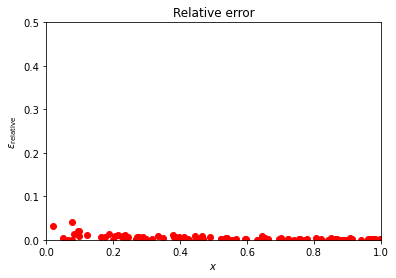

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

x = np.random.rand(100,1)
y = 5*x+0.01*np.random.randn(100,1)
linreg = LinearRegression()
linreg.fit(x,y)
ypredict = linreg.predict(x)

plt.plot(x, np.abs(ypredict-y)/abs(y), "ro")
plt.axis([0,1.0,0.0, 0.5])
plt.xlabel(r'$x$')
plt.ylabel(r'$\epsilon_{\mathrm{relative}}$')
plt.title(r'Relative error')
plt.show()

Depending on the parameter in front of the normal distribution, we may
have a small or larger relative error. Try to play around with
different training data sets and study (graphically) the value of the
relative error.

As mentioned above, **Scikit-Learn** has an impressive functionality.
We can for example extract the values of $\alpha$ and $\beta$ and
their error estimates, or the variance and standard deviation and many
other properties from the statistical data analysis. 

Here we show an
example of the functionality of **Scikit-Learn**.

The intercept alpha: 
 [1.73564461]
Coefficient beta : 
 [[5.42387441]]
Mean squared error: 0.24
Variance score: 0.92
Mean squared log error: 0.01
Mean absolute error: 0.39


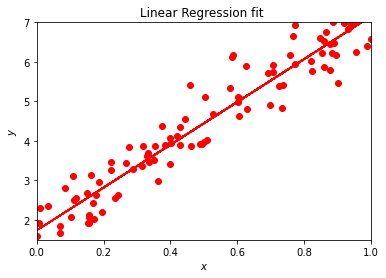

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error, mean_absolute_error

x = np.random.rand(100,1)
y = 2.0+ 5*x+0.5*np.random.randn(100,1)
linreg = LinearRegression()
linreg.fit(x,y)
ypredict = linreg.predict(x)
print('The intercept alpha: \n', linreg.intercept_)
print('Coefficient beta : \n', linreg.coef_)
# The mean squared error                               
print("Mean squared error: %.2f" % mean_squared_error(y, ypredict))
# Explained variance score: 1 is perfect prediction                                 
print('Variance score: %.2f' % r2_score(y, ypredict))
# Mean squared log error                                                        
print('Mean squared log error: %.2f' % mean_squared_log_error(y, ypredict) )
# Mean absolute error                                                           
print('Mean absolute error: %.2f' % mean_absolute_error(y, ypredict))
plt.plot(x, ypredict, "r-")
plt.plot(x, y ,'ro')
plt.axis([0.0,1.0,1.5, 7.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Linear Regression fit ')
plt.show()

The function **coef** gives us the parameter $\beta$ of our fit while **intercept** yields 
$\alpha$. Depending on the constant in front of the normal distribution, we get values near or far from $alpha =2$ and $\beta =5$. Try to play around with different parameters in front of the normal distribution. The function **meansquarederror** gives us the mean square error, a risk metric corresponding to the expected value of the squared (quadratic) error or loss defined as

$$
MSE(\hat{y},\hat{\tilde{y}}) = \frac{1}{n}
\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2,
$$

The smaller the value, the better the fit. Ideally we would like to
have an MSE equal zero.  The attentive reader has probably recognized
this function as being similar to the $\chi^2$ function defined above.

The **r2score** function computes $R^2$, the coefficient of
determination. It provides a measure of how well future samples are
likely to be predicted by the model. Best possible score is 1.0 and it
can be negative (because the model can be arbitrarily worse). A
constant model that always predicts the expected value of $\hat{y}$,
disregarding the input features, would get a $R^2$ score of $0.0$.

If $\tilde{\hat{y}}_i$ is the predicted value of the $i-th$ sample and $y_i$ is the corresponding true value, then the score $R^2$ is defined as

$$
R^2(\hat{y}, \tilde{\hat{y}}) = 1 - \frac{\sum_{i=0}^{n - 1} (y_i - \tilde{y}_i)^2}{\sum_{i=0}^{n - 1} (y_i - \bar{y})^2},
$$

where we have defined the mean value  of $\hat{y}$ as

$$
\bar{y} =  \frac{1}{n} \sum_{i=0}^{n - 1} y_i.
$$

Another quantity taht we will meet again in our discussions of regression analysis is 
 the mean absolute error (MAE), a risk metric corresponding to the expected value of the absolute error loss or what we call the $l1$-norm loss. In our discussion above we presented the relative error.
The MAE is defined as follows

$$
\text{MAE}(\hat{y}, \hat{\tilde{y}}) = \frac{1}{n} \sum_{i=0}^{n-1} \left| y_i - \tilde{y}_i \right|.
$$

We present the 
squared logarithmic (quadratic) error

$$
\text{MSLE}(\hat{y}, \hat{\tilde{y}}) = \frac{1}{n} \sum_{i=0}^{n - 1} (\log_e (1 + y_i) - \log_e (1 + \tilde{y}_i) )^2,
$$

where $\log_e (x)$ stands for the natural logarithm of $x$. This error
estimate is best to use when targets having exponential growth, such
as population counts, average sales of a commodity over a span of
years etc. 


Finally, another cost function is the Huber cost function used in robust regression.

The rationale behind this possible cost function is its reduced
sensitivity to outliers in the data set. In our discussions on
dimensionality reduction and normalization of data we will meet other
ways of dealing with outliers.

The Huber cost function is defined as

$$
H_{\delta}(a)= {\begin{cases}{\frac {1}{2}}{a^{2}}&{\text{for }}|a|\leq \delta , \delta (|a|-{\frac {1}{2}}\delta ),&{\text{otherwise}}\end{cases}}
$$

Here $a=\boldsymbol{y} - \boldsymbol{\tilde{y}}$.
We will discuss in more
detail these and other functions in the various lectures.  We conclude this part with another example. Instead of 
a linear $x$-dependence we study now a cubic polynomial and use the polynomial regression analysis tools of scikit-learn.

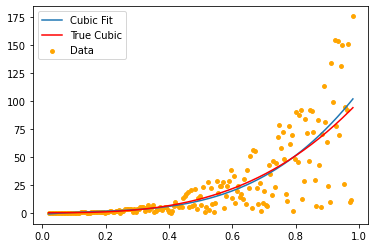

0.005000000000000002


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

x=np.linspace(0.02,0.98,200)
noise = np.asarray(random.sample((range(200)),200))
y=x**3*noise
yn=x**3*100
poly3 = PolynomialFeatures(degree=3)
X = poly3.fit_transform(x[:,np.newaxis])
clf3 = LinearRegression()
clf3.fit(X,y)

Xplot=poly3.fit_transform(x[:,np.newaxis])
poly3_plot=plt.plot(x, clf3.predict(Xplot), label='Cubic Fit')
plt.plot(x,yn, color='red', label="True Cubic")
plt.scatter(x, y, label='Data', color='orange', s=15)
plt.legend()
plt.show()

def error(a):
    for i in y:
        err=(y-yn)/yn
    return abs(np.sum(err))/len(err)

print (error(y))

Let us now dive into  nuclear physics and remind ourselves briefly about some basic features about binding
energies.  A basic quantity which can be measured for the ground
states of nuclei is the atomic mass $M(N, Z)$ of the neutral atom with
atomic mass number $A$ and charge $Z$. The number of neutrons is $N$. There are indeed several sophisticated experiments worldwide which allow us to measure this quantity to high precision (parts per million even). 

Atomic masses are usually tabulated in terms of the mass excess defined by

$$
\Delta M(N, Z) =  M(N, Z) - uA,
$$

where $u$ is the Atomic Mass Unit

$$
u = M(^{12}\mathrm{C})/12 = 931.4940954(57) \hspace{0.1cm} \mathrm{MeV}/c^2.
$$

The nucleon masses are

$$
m_p =  1.00727646693(9)u,
$$

and

$$
m_n = 939.56536(8)\hspace{0.1cm} \mathrm{MeV}/c^2 = 1.0086649156(6)u.
$$

In the [2016 mass evaluation of by W.J.Huang, G.Audi, M.Wang, F.G.Kondev, S.Naimi and X.Xu](http://nuclearmasses.org/resources_folder/Wang_2017_Chinese_Phys_C_41_030003.pdf)
there are data on masses and decays of 3437 nuclei.

The nuclear binding energy is defined as the energy required to break
up a given nucleus into its constituent parts of $N$ neutrons and $Z$
protons. In terms of the atomic masses $M(N, Z)$ the binding energy is
defined by

$$
BE(N, Z) = ZM_H c^2 + Nm_n c^2 - M(N, Z)c^2 ,
$$

where $M_H$ is the mass of the hydrogen atom and $m_n$ is the mass of the neutron.
In terms of the mass excess the binding energy is given by

$$
BE(N, Z) = Z\Delta_H c^2 + N\Delta_n c^2 -\Delta(N, Z)c^2 ,
$$

where $\Delta_H c^2 = 7.2890$ MeV and $\Delta_n c^2 = 8.0713$ MeV.


A popular and physically intuitive model which can be used to parametrize 
the experimental binding energies as function of $A$, is the so-called 
**liquid drop model**. The ansatz is based on the following expression

$$
BE(N,Z) = a_1A-a_2A^{2/3}-a_3\frac{Z^2}{A^{1/3}}-a_4\frac{(N-Z)^2}{A},
$$

where $A$ stands for the number of nucleons and the $a_i$s are parameters which are determined by a fit 
to the experimental data.  




To arrive at the above expression we have assumed that we can make the following assumptions:

 * There is a volume term $a_1A$ proportional with the number of nucleons (the energy is also an extensive quantity). When an assembly of nucleons of the same size is packed together into the smallest volume, each interior nucleon has a certain number of other nucleons in contact with it. This contribution is proportional to the volume.

 * There is a surface energy term $a_2A^{2/3}$. The assumption here is that a nucleon at the surface of a nucleus interacts with fewer other nucleons than one in the interior of the nucleus and hence its binding energy is less. This surface energy term takes that into account and is therefore negative and is proportional to the surface area.

 * There is a Coulomb energy term $a_3\frac{Z^2}{A^{1/3}}$. The electric repulsion between each pair of protons in a nucleus yields less binding. 

 * There is an asymmetry term $a_4\frac{(N-Z)^2}{A}$. This term is associated with the Pauli exclusion principle and reflects the fact that the proton-neutron interaction is more attractive on the average than the neutron-neutron and proton-proton interactions.

We could also add a so-called pairing term, which is a correction term that
arises from the tendency of proton pairs and neutron pairs to
occur. An even number of particles is more stable than an odd number. 